In [33]:
%load_ext autoreload
%autoreload 2

import os
import re
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib ipympl

from typing import Tuple, Union, Callable, List


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
data_path = os.path.abspath('../donnees/vents')
imp_path = os.path.join(data_path, 'impedance')
mouth_path = os.path.join(data_path, 'bouche_flute')
mouth_mes_path = os.path.join(mouth_path, 'mesures')

## Mesures et diagrammes de bifurcation

In [35]:
mouth_data_pat = re.compile(r'\w+\.csv')

mouth_mes_files = [(os.path.splitext(x)[0], os.path.join(mouth_mes_path, x)) for x in os.listdir(mouth_mes_path) if mouth_data_pat.match(x)]
mouth_mes = dict([(mes_file[0], np.loadtxt(mes_file[1], skiprows=1, delimiter=',')) for mes_file in mouth_mes_files])
# columns: input pressure | output freq | output tension

mouth_ext = np.loadtxt(os.path.join(mouth_path, 'ext.csv'), skiprows=1, delimiter=',')
print(mouth_ext)

[[ 1. 48.]
 [ 0. 43.]
 [ 1. 35.]
 [ 0. 25.]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
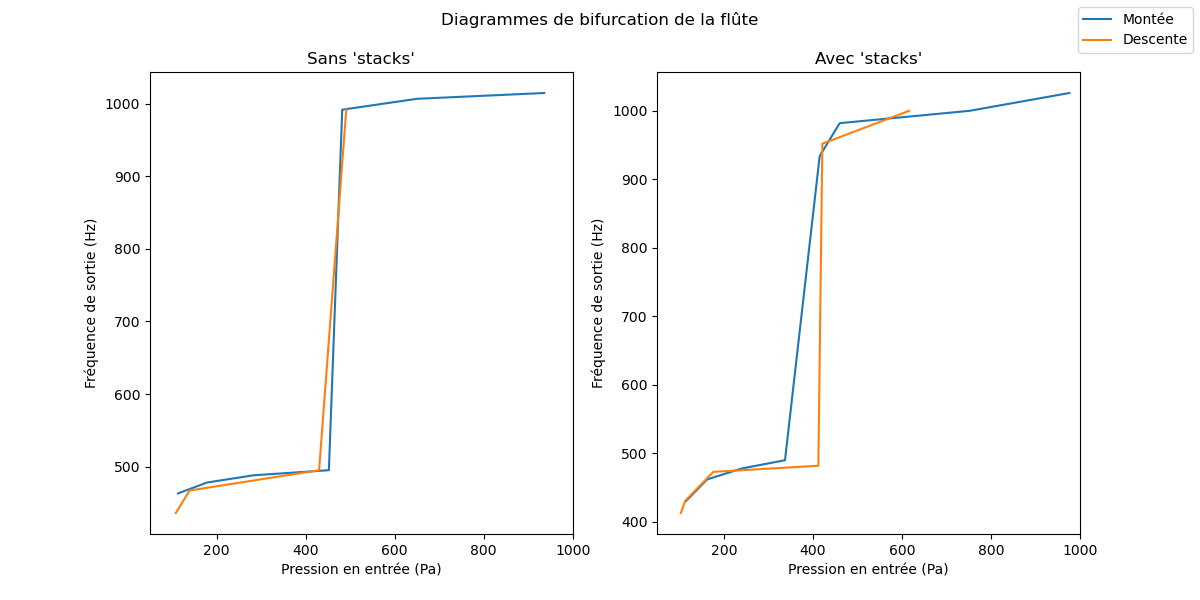

In [36]:
d_sm = mouth_mes['sm']
d_sd = mouth_mes['sd']
d_nm = mouth_mes['nm']
d_nd = mouth_mes['nd']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Diagrammes de bifurcation de la flûte")
plot_nm, = axes[0].plot(d_nm[:, 0], d_nm[:, 1])
plot_nd, = axes[0].plot(d_nd[:, 0], d_nd[:, 1])
plot_sm, = axes[1].plot(d_sm[:, 0], d_sm[:, 1])
plot_sd, = axes[1].plot(d_sd[:, 0], d_sd[:, 1])
#
axes[0].set_title("Sans 'stacks'")
axes[1].set_title("Avec 'stacks'")
axes[0].set_xlabel("Pression en entrée (Pa)")
axes[0].set_ylabel("Fréquence de sortie (Hz)")
axes[0].set_xlim(50, 1000)
axes[1].set_xlabel("Pression en entrée (Pa)")
axes[1].set_ylabel("Fréquence de sortie (Hz)")
axes[1].set_xlim(50, 1000)
#
fig.legend([plot_nm, plot_nd], ['Montée', 'Descente'])
#
plt.show()

## Mesures d'impédance

In [47]:
imp_data_pat = re.compile(r'(?P<it>\d+)_(?P<cond>\w+).csv')

def get_imp_measure_info(pat: re.Pattern, f: str):
    m_path = re.match(pat, f)
    if m_path is None:
        raise AttributeError(f"Pattern {pat} not found in {f}.")
    g_path = m_path.groupdict()
    return g_path

imp_mes = dict()
for f in os.listdir(imp_path):
    path = os.path.join(imp_path, f)
    info = get_imp_measure_info(imp_data_pat, f)
    if not info['cond'] in imp_mes:
        imp_mes[info['cond']] = [None] * 2
    imp_mes[info['cond']] = np.loadtxt(path, skiprows=1, delimiter=',')
for mes in imp_mes:
    imp_mes[mes] = np.array(imp_mes[mes])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
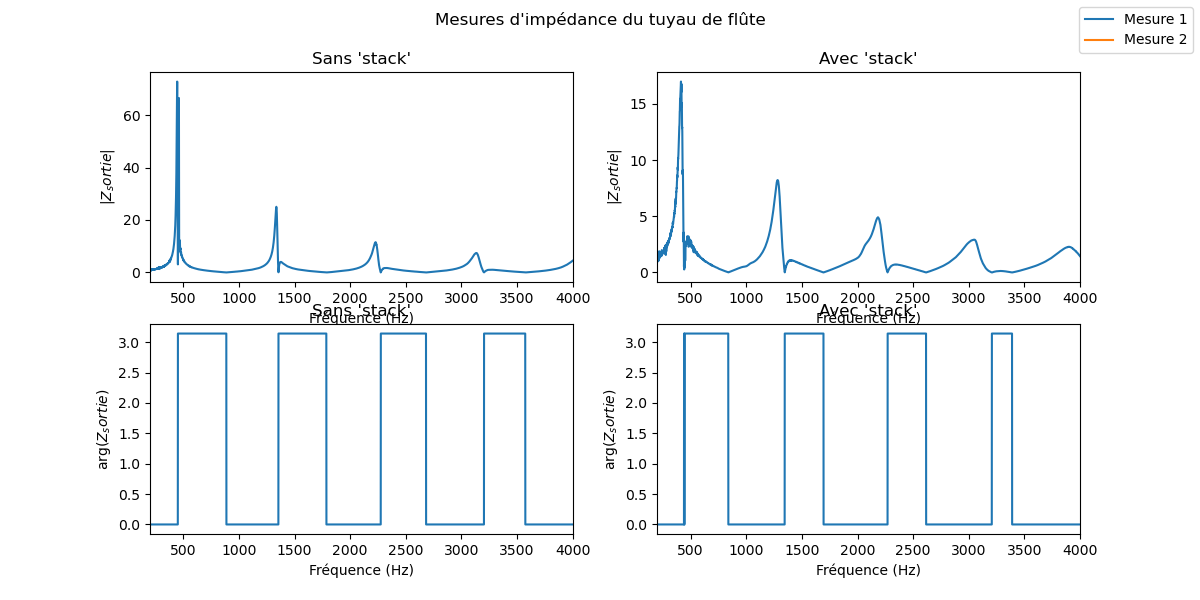

In [59]:

def a(d: np.ndarray, axes, idx: int, title: str, x_lim: Tuple[float, float], x_label: str, y_label: str):
    f = d[:, 0]
    z = d[:,1] + d[:,2]
    z_mod = np.abs(z)
    z_phase = np.angle(z)
    plot_1, = axes[0][idx].plot(f, z_mod)
    plot_2, = axes[1][idx].plot(f, z_phase)
    axes[0][idx].set_title(title)
    axes[0][idx].set_xlabel(x_label)
    axes[0][idx].set_ylabel(f"|{y_label}|")
    axes[0][idx].set_xlim(x_lim)
    axes[1][idx].set_title(title)
    axes[1][idx].set_xlabel(x_label)
    axes[1][idx].set_ylabel(f"arg({y_label})")
    axes[1][idx].set_xlim(x_lim)
    return plot_1, plot_2

d_imp_n = imp_mes['n'] # no stack
d_imp_s = imp_mes['s'] # stack
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

fig.suptitle("Mesures d'impédance du tuyau de flûte")

a(d_imp_n, axes, 0, "Sans 'stack'", (200, 4000), 'Fréquence (Hz)', '$Z_sortie$')
a(d_imp_s, axes, 1, "Avec 'stack'", (200, 4000), 'Fréquence (Hz)', '$Z_sortie$')

fig.legend([plot_nm, plot_nd], ['Mesure 1', 'Mesure 2'])
#
plt.show()